In [1]:
from IPython.display import display, Markdown
from datetime import datetime
cur_datetime = datetime.now()
display(Markdown(f'# {cur_datetime.strftime("%d/%b/%Y %H:%M")}'))

# 08/Jul/2020 10:19

In [2]:
%%capture
%matplotlib inline

# Dependences
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Experiments
import run

In [3]:
# Run all experiments. Typical run duration for an Core-i3 laptop is about 2-3min.
# Tweak the prey_predator_abm/sim_params.py file if you want it to take longer (or not).
start_time = time()
experiments = run.run()
end_time = time()
print("Execution in {:.1f}s".format(end_time - start_time))


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x7f17eb615100>, <cadCAD.configuration.Configuration object at 0x7f17eb401220>, <cadCAD.configuration.Configuration object at 0x7f17eb3f6370>, <cadCAD.configuration.Configuration object at 0x7f17eb3f6b50>, <cadCAD.configuration.Configuration object at 0x7f17eb38b430>, <cadCAD.configuration.Configuration object at 0x7f17eb38b310>, <cadCAD.configuration.Configuration object at 0x7f17eb38b640>]
Configurations: [<cadCAD.configuration.Configuration object at 0x7f17eb615100>, <cadCAD.configuration.Configuration object at 0x7f17eb401220>, <cadCAD.configuration.Configuration object at 0x7f17eb3f6370>, <cadCAD.configuration.Configuration object at 0x7f17eb3


11
1
1


1111
1


1

1
111

1
11

1
11


1
111
1
1
111


1

1
11
1

1
1
1
111

11
1

1

11
1


1
11
11

1
1
1

11111
1


1


1
1
111
111
1
1


11


1111
1
1
11
1





1
1111
1
1

1


11

11

1111
1
11


1
1


111
1
1
1
11


1
111

1

111


1
111


11

1
1
111
11




11

1
111
1
111

1



111

1
11

11111

1



111


11

11
1

1
1
1
1
11

1
1

111


1
11
1

111


11
1
11

1
11
111


1

11
11
1

11111
1

1



1


1
1
11
1

11
1

11
11
1
111
1




11

111

11
1
111

1
111
11
1


1




111


11111
1




11

111
1


11
111
1


1
111111

111




1
1


1
11
111

1


1

111
11


11
1


111
1

1
1

1
11

1111

1
1


111

1111
11





11111



11
1
1
111




111


1
11

11
1

111
11



1111
11


11

11111




1
11



111


11
1
111


11
111


1


11
1

1
11111
1
1

1
1

11
11


1

111
1

11
1



111


11

111
1


1
1
11

1
1
111
1


11
11

1
11
1

1111


1
1
111


11
1



11111




111


111
11
1



1
1
11
1
11


111
111


11


1111



111

1


1
111

1
11


1
11
1

111


111

11


111

1
11
11

1


1
1

11111
1
1

1
11


11
1



1
1
11

11
11

111
1
1



11

11
11
11

111




111
1

1
11
1

1

11111
1



1

1111111

1



11


1

111

1
1

11

1111

11



11

11
11
1
1
11

1

1
1
1

11111



1
11
1111


1
11



1

1
1
1
11
1
11
11



111
1

111

1
1

111
1


111



1
11
111

1


11
1
11


11
1

111


11111

1

1
1
11


1
1

111


1111

1

11
1


111


1111


11

11
11



111

1
1
1

111


1111

1


11
11
1
1


11111

1

11

11
1
11
1
1



1

1111

1

111



1
1
11
1
11
1
1


111


11

1
1
11
111

1

11111

1

11


1
1

1
11
1
11
1



11
1111
1
1
1
1
11


1

11


1

11
1
1

11111


1
11111




1

111

11111






111
11

11
1

1111



1

11


1
1
1111

111

1
11

111
1



1
11

111


1

1

11

111

1
11


11
1

11
11
11
11

11

1
11



1111


1

1

111


111

1
11

1

11
1

1
11
1

1
111


1
Execution in 29.7s


In [5]:
def clean_df(df):
    df.reset_index(inplace=True)
    df.drop(['index'], axis=1, inplace=True)
    
def take_percentiles(df, percentile):
    upper_ = list()
    for row in df:
        mu = row.mean()
        sigma = row.std()
        normal_dist = np.random.normal(mu, sigma, 1000)
        upper_.append(np.percentile(normal_dist, percentile))
    return upper_    

def take_max(df):
    max_ = list()
    for row in df:
        max_.append(row.max())
    return max_

def take_min(df):
    min_ = list()
    for row in df:
        min_.append(row.min())
    return min_

def take_mean(df):
    mean_ = list()
    for row in df:
        mean_.append(row.sum()/len(row))
    return mean_

In [6]:
from covid_19_stochastic.config import MONTE_CARLO_RUNS

dataframe = experiments.dataset[3]
dfs = np.array_split(dataframe, MONTE_CARLO_RUNS)
for df in dfs:
    clean_df(df)

In [7]:
susceptible = []
exposed = []
infected = []
recovered = []
for df in dfs:
    clean_df(df)
    susceptible.append(df['susceptible'].values)
    exposed.append(df['exposed'].values)
    infected.append(df['infected'].values)
    recovered.append(df['recovered'].values)
    
susceptible = np.transpose(susceptible)
exposed = np.transpose(exposed)
infected = np.transpose(infected)
recovered = np.transpose(recovered)

In [8]:
raw_data = {'susceptible': list(susceptible[:]), 
            'exposed': list(exposed[:]),
            'infected': list(infected[:]),
            'recovered': list(recovered[:])
           }
result = pd.DataFrame(raw_data, 
                      columns=['susceptible', 
                               'exposed', 
                               'infected', 
                               'recovered'])
result['timestep'] = dfs[0]['timestep']

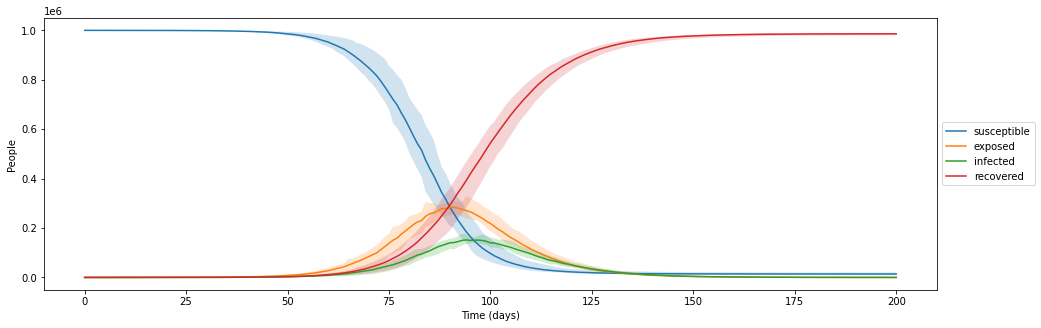

In [9]:
plt.rcParams["figure.figsize"]=20,5

fig, ax = plt.subplots()

ax.plot(result['timestep'], take_mean(result['susceptible']), label='susceptible')
ax.fill_between(result['timestep'],
                take_min(result['susceptible']), 
                take_max(result['susceptible']), alpha=0.2)

ax.plot(result['timestep'], take_mean(result['exposed']), label='exposed')
ax.fill_between(result['timestep'],
                take_min(result['exposed']), 
                take_max(result['exposed']), alpha=0.2)

ax.plot(result['timestep'], take_mean(result['infected']), label='infected')
ax.fill_between(result['timestep'],
                take_min(result['infected']), 
                take_max(result['infected']), alpha=0.2)

ax.plot(result['timestep'], take_mean(result['recovered']), label='recovered')
ax.fill_between(result['timestep'],
                take_min(result['recovered']), 
                take_max(result['recovered']), alpha=0.2)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Time (days)")
ax.set_ylabel("People")
plt.show()

In [23]:
list_ = list()
for df in experiments.dataset[3:]:
    list_.append(df)
dataframe = pd.concat(list_)

In [31]:
dfs = np.array_split(dataframe, len(experiments.dataset[3:])*MONTE_CARLO_RUNS)
for df in dfs:
    clean_df(df)

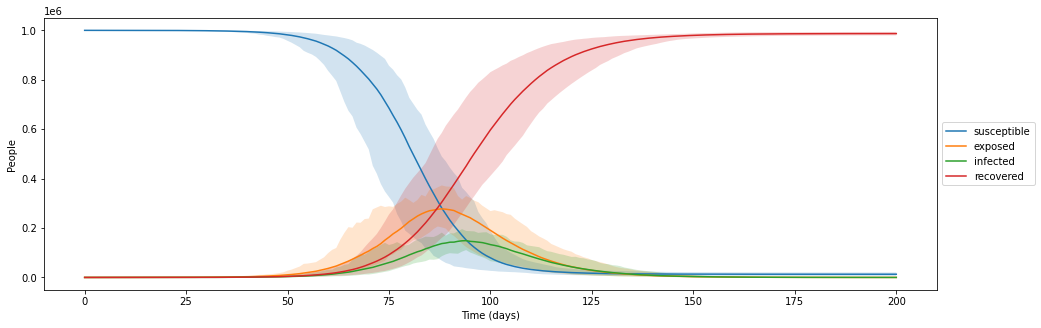

In [33]:
susceptible = []
exposed = []
infected = []
recovered = []
for df in dfs:
    clean_df(df)
    susceptible.append(df['susceptible'].values)
    exposed.append(df['exposed'].values)
    infected.append(df['infected'].values)
    recovered.append(df['recovered'].values)
    
susceptible = np.transpose(susceptible)
exposed = np.transpose(exposed)
infected = np.transpose(infected)
recovered = np.transpose(recovered)

raw_data = {'susceptible': list(susceptible[:]), 
            'exposed': list(exposed[:]),
            'infected': list(infected[:]),
            'recovered': list(recovered[:])
           }
result = pd.DataFrame(raw_data, 
                      columns=['susceptible', 
                               'exposed', 
                               'infected', 
                               'recovered'])
result['timestep'] = dfs[0]['timestep']

plt.rcParams["figure.figsize"]=20,5

fig, ax = plt.subplots()

ax.plot(result['timestep'], take_mean(result['susceptible']), label='susceptible')
ax.fill_between(result['timestep'],
                take_min(result['susceptible']), 
                take_max(result['susceptible']), alpha=0.2)

ax.plot(result['timestep'], take_mean(result['exposed']), label='exposed')
ax.fill_between(result['timestep'],
                take_min(result['exposed']), 
                take_max(result['exposed']), alpha=0.2)

ax.plot(result['timestep'], take_mean(result['infected']), label='infected')
ax.fill_between(result['timestep'],
                take_min(result['infected']), 
                take_max(result['infected']), alpha=0.2)

ax.plot(result['timestep'], take_mean(result['recovered']), label='recovered')
ax.fill_between(result['timestep'],
                take_min(result['recovered']), 
                take_max(result['recovered']), alpha=0.2)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Time (days)")
ax.set_ylabel("People")
plt.show()

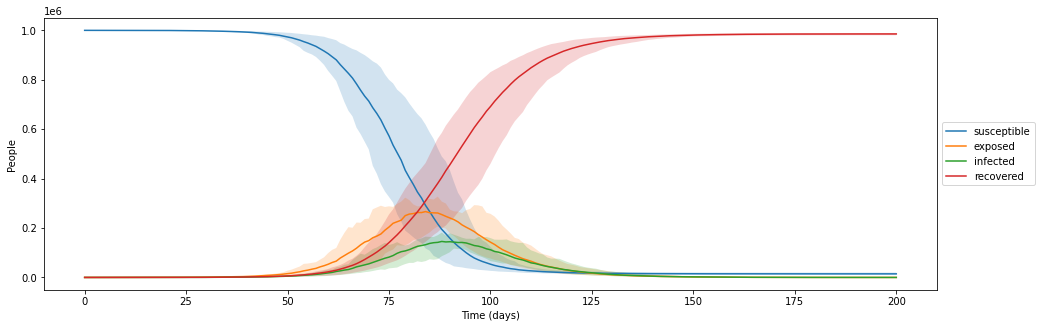

In [36]:
dataframe = experiments.dataset[6]
dfs = np.array_split(dataframe, MONTE_CARLO_RUNS)
for df in dfs:
    clean_df(df)
    
susceptible = []
exposed = []
infected = []
recovered = []
for df in dfs:
    clean_df(df)
    susceptible.append(df['susceptible'].values)
    exposed.append(df['exposed'].values)
    infected.append(df['infected'].values)
    recovered.append(df['recovered'].values)
    
susceptible = np.transpose(susceptible)
exposed = np.transpose(exposed)
infected = np.transpose(infected)
recovered = np.transpose(recovered)

raw_data = {'susceptible': list(susceptible[:]), 
            'exposed': list(exposed[:]),
            'infected': list(infected[:]),
            'recovered': list(recovered[:])
           }
result = pd.DataFrame(raw_data, 
                      columns=['susceptible', 
                               'exposed', 
                               'infected', 
                               'recovered'])
result['timestep'] = dfs[0]['timestep']

plt.rcParams["figure.figsize"]=20,5

fig, ax = plt.subplots()

ax.plot(result['timestep'], take_mean(result['susceptible']), label='susceptible')
ax.fill_between(result['timestep'],
                take_min(result['susceptible']), 
                take_max(result['susceptible']), alpha=0.2)

ax.plot(result['timestep'], take_mean(result['exposed']), label='exposed')
ax.fill_between(result['timestep'],
                take_min(result['exposed']), 
                take_max(result['exposed']), alpha=0.2)

ax.plot(result['timestep'], take_mean(result['infected']), label='infected')
ax.fill_between(result['timestep'],
                take_min(result['infected']), 
                take_max(result['infected']), alpha=0.2)

ax.plot(result['timestep'], take_mean(result['recovered']), label='recovered')
ax.fill_between(result['timestep'],
                take_min(result['recovered']), 
                take_max(result['recovered']), alpha=0.2)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Time (days)")
ax.set_ylabel("People")
plt.show()

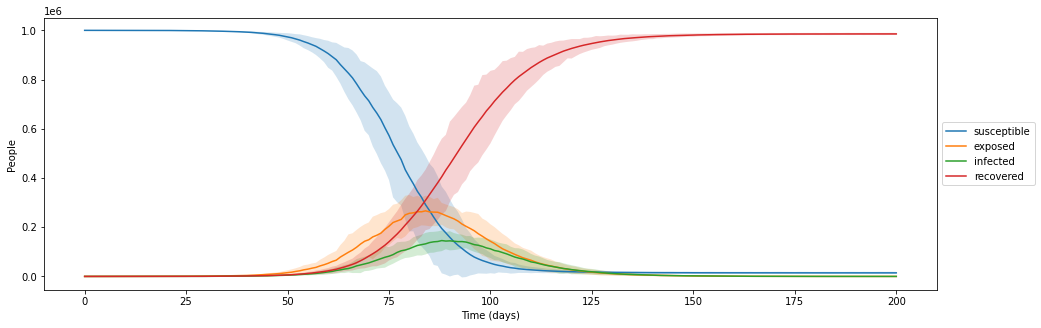

In [63]:
dataframe = experiments.dataset[6]
dfs = np.array_split(dataframe, MONTE_CARLO_RUNS)
for df in dfs:
    clean_df(df)
    
susceptible = []
exposed = []
infected = []
recovered = []
for df in dfs:
    clean_df(df)
    susceptible.append(df['susceptible'].values)
    exposed.append(df['exposed'].values)
    infected.append(df['infected'].values)
    recovered.append(df['recovered'].values)
    
susceptible = np.transpose(susceptible)
exposed = np.transpose(exposed)
infected = np.transpose(infected)
recovered = np.transpose(recovered)

raw_data = {'susceptible': list(susceptible[:]), 
            'exposed': list(exposed[:]),
            'infected': list(infected[:]),
            'recovered': list(recovered[:])
           }
result = pd.DataFrame(raw_data, 
                      columns=['susceptible', 
                               'exposed', 
                               'infected', 
                               'recovered'])
result['timestep'] = dfs[0]['timestep']

plt.rcParams["figure.figsize"]=20,5

fig, ax = plt.subplots()

ax.plot(result['timestep'], take_mean(result['susceptible']), label='susceptible')
ax.fill_between(result['timestep'],
                take_percentiles(result['susceptible'], 5), 
                take_percentiles(result['susceptible'], 95), alpha=0.2)

ax.plot(result['timestep'], take_mean(result['exposed']), label='exposed')
ax.fill_between(result['timestep'],
                take_percentiles(result['exposed'], 5), 
                take_percentiles(result['exposed'], 95), alpha=0.2)

ax.plot(result['timestep'], take_mean(result['infected']), label='infected')
ax.fill_between(result['timestep'],
                take_percentiles(result['infected'], 5), 
                take_percentiles(result['infected'], 95), alpha=0.2)

ax.plot(result['timestep'], take_mean(result['recovered']), label='recovered')
ax.fill_between(result['timestep'],
                take_percentiles(result['recovered'], 5), 
                take_percentiles(result['recovered'], 95), alpha=0.2)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Time (days)")
ax.set_ylabel("People")
plt.show()

In [38]:
dataframe = experiments.dataset[6]
dfs = np.array_split(dataframe, MONTE_CARLO_RUNS)
for df in dfs:
    clean_df(df)
    
susceptible = []
exposed = []
infected = []
recovered = []
for df in dfs:
    clean_df(df)
    susceptible.append(df['susceptible'].values)
    exposed.append(df['exposed'].values)
    infected.append(df['infected'].values)
    recovered.append(df['recovered'].values)
    
susceptible = np.transpose(susceptible)
exposed = np.transpose(exposed)
infected = np.transpose(infected)
recovered = np.transpose(recovered)

raw_data = {'susceptible': list(susceptible[:]), 
            'exposed': list(exposed[:]),
            'infected': list(infected[:]),
            'recovered': list(recovered[:])
           }
result = pd.DataFrame(raw_data, 
                      columns=['susceptible', 
                               'exposed', 
                               'infected', 
                               'recovered'])
result['timestep'] = dfs[0]['timestep']

In [47]:
print(result['susceptible'].iloc[60].mean())
print(result['susceptible'].iloc[60].std())

905625.7
32427.722874263003


In [50]:
mu = 905625.7
sigma = 32427.722874263003
s = np.random.normal(mu, sigma, 1000)

(array([  7.,  21.,  76., 144., 241., 251., 147.,  74.,  34.,   5.]),
 array([ 801251.11057959,  822090.19111027,  842929.27164095,
         863768.35217162,  884607.4327023 ,  905446.51323298,
         926285.59376366,  947124.67429433,  967963.75482501,
         988802.83535569, 1009641.91588637]),
 <a list of 10 Patch objects>)

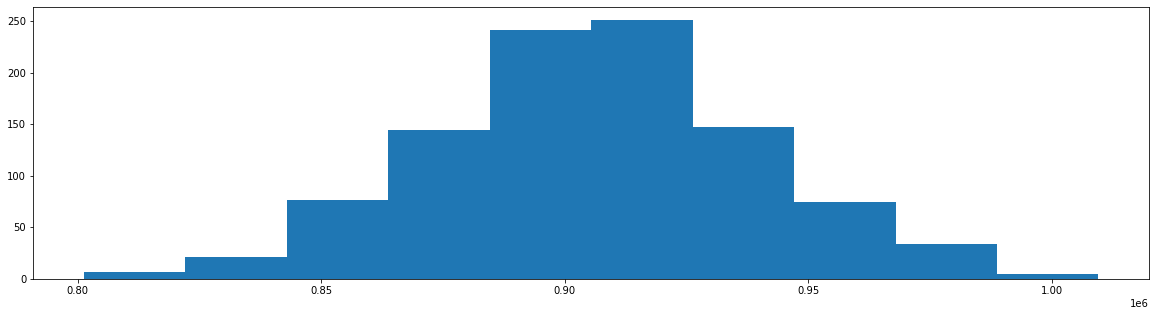

In [53]:
plt.hist(s)


In [55]:
np.percentile(s, 5)

849812.0427793432

In [56]:
np.percentile(s, 95)

959997.4461078068